<a href="https://colab.research.google.com/github/Karancse/Bank_Note_Authentication_using_MLDM/blob/main/Decision_Tree_Ensembles_with_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
data

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
data.columns = ['VWT','SWT','CWT','E','C']

In [ ]:
df = data.drop(['E'],axis=1) 
df.head()

,VWT,SWT,CWT,C
0,4.54590,8.1674,-2.4586,0
1,3.86600,-2.6383,1.9242,0
2,3.45660,9.5228,-4.0112,0
3,0.32924,-4.4552,4.5718,0
4,4.36840,9.6718,-3.9606,0


In [ ]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = ['VWT','SWT','CWT','C']

print(normalized_df)

           VWT       SWT       CWT    C
0     0.835659  0.820982  0.121804  0.0
1     0.786629  0.416648  0.310608  0.0
2     0.757105  0.871699  0.054921  0.0
3     0.531578  0.348662  0.424662  0.0
4     0.822859  0.877275  0.057100  0.0
...        ...       ...       ...  ...
1366  0.537124  0.565855  0.165249  1.0
1367  0.407690  0.332868  0.506753  1.0
1368  0.237385  0.011768  0.985603  1.0
1369  0.250842  0.201701  0.761587  1.0
1370  0.324528  0.490747  0.343348  1.0

[1371 rows x 4 columns]


In [ ]:
df = normalized_df

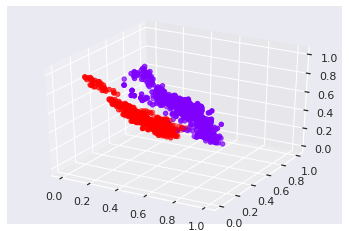

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z_axis = df['SWT']
x_axis = df['VWT']
y_axis = df['CWT']
ax.scatter3D(x_axis, y_axis, z_axis, c=df['C'], cmap='rainbow')

In [ ]:
X = df.drop(['C'],axis=1)
Y = df[['C']]

In [ ]:
seed = 8
kfold = model_selection.KFold(n_splits = 3,
					random_state = seed)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
base_cls = DecisionTreeClassifier()

num_trees = 500

model = BaggingClassifier(base_estimator = base_cls,
						n_estimators = num_trees,
						random_state = seed)

In [ ]:
results = model_selection.cross_val_score(model, X, Y, cv = kfold)
print("accuracy :")
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy :
0.975929978118162
